In [1]:
import pandas as pd
import pandas_profiling 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
bank = pd.read_csv("../Data/bank-full.csv", sep=";")

In [3]:
#Making some copies just in case
bank_1 = bank.copy()
bank_2 = bank.copy()

In [4]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Check for missing values

In [5]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values.

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank.pdays = bank.pdays.replace(-1, 0)

In [8]:
bank["contact"].replace({"unknown": "telephone"}, inplace=True)

In [9]:
bank["poutcome"].replace({"other": "unknown"}, inplace=True)

In [10]:
df_cat = bank.select_dtypes("object")

df_num = bank.select_dtypes("number")

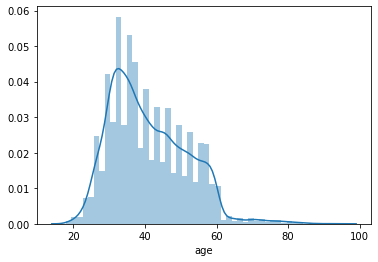

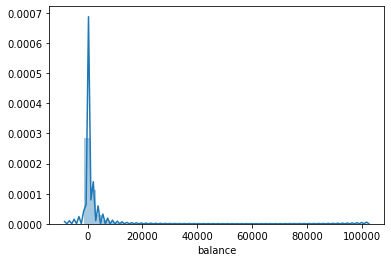

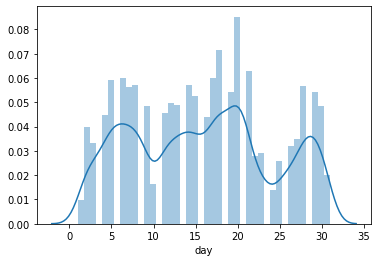

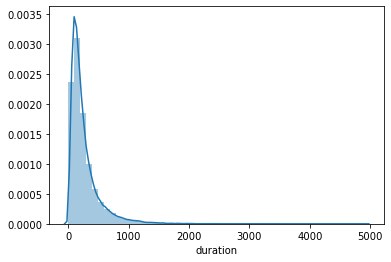

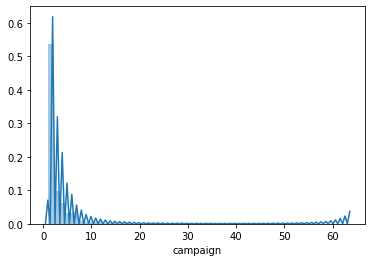

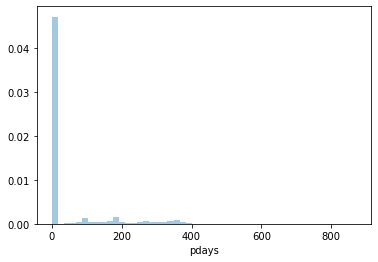

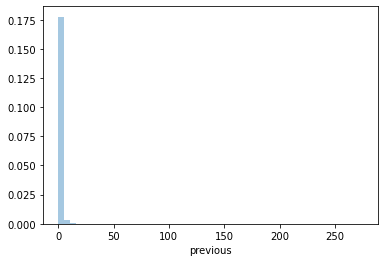

In [11]:
# Displaying Numerical Columns
for col in df_num.columns: 
    sns.distplot(df_num[col])
    plt.show()


## EDA of the categorical variables

Define a function to plot with the target variable Yes or NO

In [12]:
df_copy = bank.copy()

In [13]:
def plot(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No'] = df_copy[df_copy['y'] == 'no'][column].value_counts()
    temp_1['Yes'] = df_copy[df_copy['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar', color=('red', 'green'))
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and term deposits'.format(column))
    plt.show();

Term Deposits

Text(0.5, 0, 'Target class')

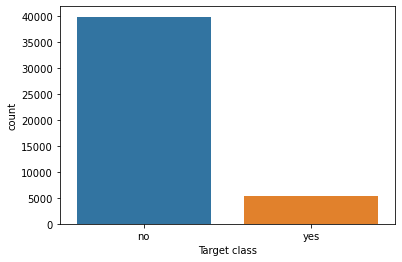

In [14]:
sns.countplot(x=bank['y'])
plt.xlabel('Target class')

In [15]:
bank.y.value_counts()/len(bank.y)

no     0.883015
yes    0.116985
Name: y, dtype: float64

We have an imbalanced dataset. Over 80% of the target variable is for no. 
I will have to do something about this later on.

### Job Variable

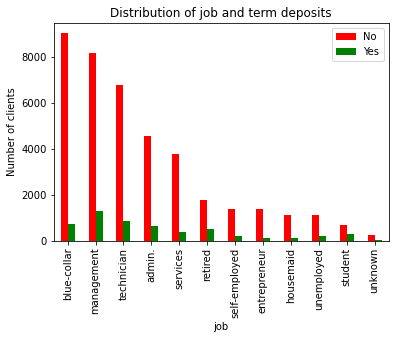

In [16]:
plot('job')

In [17]:
print(f"The success rate of targeting a person with jobs:")
for x in bank.job.unique():
    print(f"{x} job was {round((bank[bank['job'] == x].y.value_counts()[1]/len(bank[bank['job'] == x]))*100)} %")

The success rate of targeting a person with jobs:
management job was 14.0 %
technician job was 11.0 %
entrepreneur job was 8.0 %
blue-collar job was 7.0 %
unknown job was 12.0 %
retired job was 23.0 %
admin. job was 12.0 %
services job was 9.0 %
self-employed job was 12.0 %
unemployed job was 16.0 %
housemaid job was 9.0 %
student job was 29.0 %


People with management and technician jobs opened the more term deposits than any other. In proportion students and retired persons should be targeted.

### Marital Variable

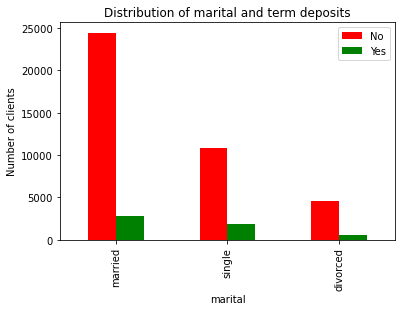

In [18]:
plot('marital')

In [19]:
print(f"The success rate of targeting a person with the status:")
for x in bank.marital.unique():
    print(f"{x} was {round((bank[bank['marital'] == x].y.value_counts()[1]/len(bank[bank['marital'] == x]))*100)} %")

The success rate of targeting a person with the status:
married was 10.0 %
single was 15.0 %
divorced was 12.0 %


In [20]:
bank.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Mostly married people were targeted. In proportion, single people should be more targeted. But this really doesnt give me anything of importance. Unknown marital status. might have to look into that

### Education Variable

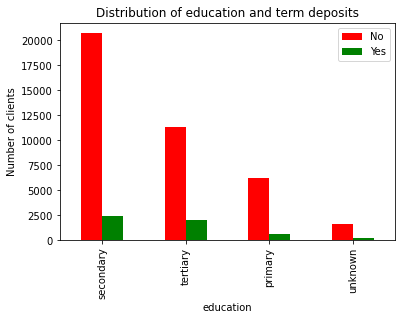

In [21]:
plot('education')

In [22]:
print(f"The success rate of targeting a person with the education:")
for x in bank.education.unique():
    print(f"{x} was {round((bank[bank['education'] == x].y.value_counts()[1]/len(bank[bank['education'] == x]))*100)} %")

The success rate of targeting a person with the education:
tertiary was 15.0 %
secondary was 11.0 %
unknown was 14.0 %
primary was 9.0 %


People with a university degree or a highschool diploma were targeted more. Because there are so few 'iliterate', the proprtion of opening a term deposit is higher.

### Default Variable

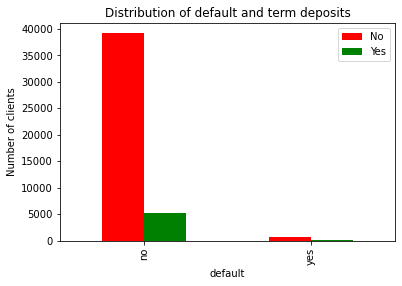

In [23]:
plot('default')

Of course, the bank targeted people with no default.

### Housing Loan Variable

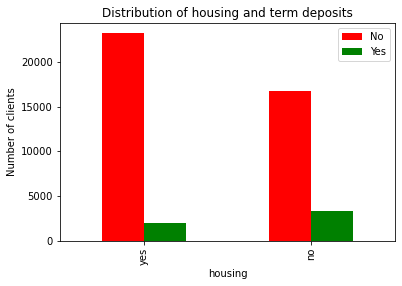

In [24]:
plot('housing')

We cannot see much from this plot. It seems the bank targets both clients with or without housing loans

### Loan Variable

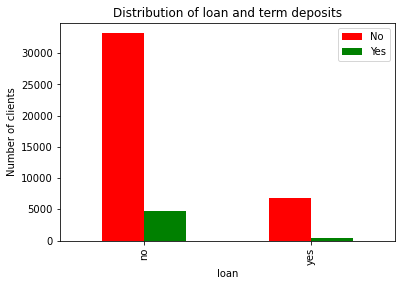

In [25]:
plot('loan')

We can see clearly from the plot that the bank targets more the clients that do not have a loan with the bank.

### Contact Variable

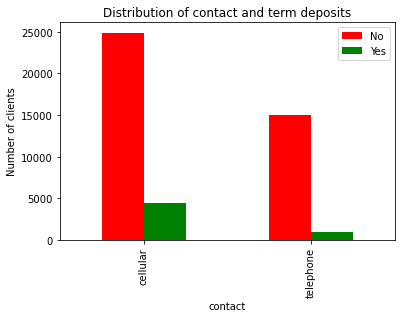

In [26]:
plot('contact')

The bank uses the cellular to contact more clients, nothing clear in the plot.
I think the only way this campaign was deployed was either telephone or mobile.

### Month contacted Variable

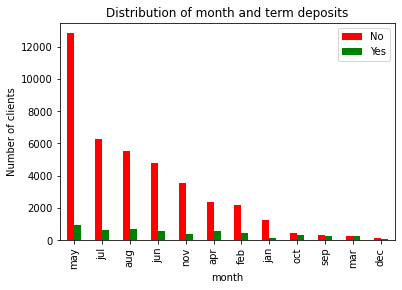

In [27]:
plot('month')

In [28]:
print(f"The success rate of targeting a person during the month:")
for x in bank.month.unique():
    print(f"{x} was {round((bank[bank['month'] == x].y.value_counts()[1]/len(bank[bank['month'] == x]))*100)} %. Amount of people contacted during {x} was {len(bank[bank['month'] == x])}")

The success rate of targeting a person during the month:
may was 7.0 %. Amount of people contacted during may was 13766
jun was 10.0 %. Amount of people contacted during jun was 5341
jul was 9.0 %. Amount of people contacted during jul was 6895
aug was 11.0 %. Amount of people contacted during aug was 6247
oct was 44.0 %. Amount of people contacted during oct was 738
nov was 10.0 %. Amount of people contacted during nov was 3970
dec was 47.0 %. Amount of people contacted during dec was 214
jan was 10.0 %. Amount of people contacted during jan was 1403
feb was 17.0 %. Amount of people contacted during feb was 2649
mar was 48.0 %. Amount of people contacted during mar was 477
apr was 20.0 %. Amount of people contacted during apr was 2932
sep was 46.0 %. Amount of people contacted during sep was 579


May is the month where the bank decides to contact their clients more. In proportion, march and december are the months the bank should be contacting their clients.

### Age Variable

Order the ages into groups so we can have a better understanding of the ages

In [29]:
df_copy = bank.copy()
lst = [df_copy]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 40), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 50), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 60), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

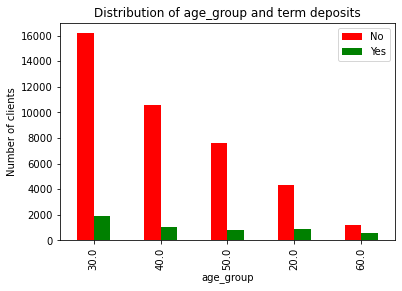

In [30]:
plot('age_group')

In [31]:
print(f"The success rate of targeting a person of age:")
for x in df_copy.age_group.unique():
    print(f"{x} was {round((df_copy[df_copy['age_group'] == x].y.value_counts()[1]/len(df_copy[df_copy['age_group'] == x]))*100)} %. Amount of people contacted thar are in their {x} was {len(df_copy[df_copy['age_group'] == x])}")

The success rate of targeting a person of age:
50.0 was 9.0 %. Amount of people contacted thar are in their 50.0 was 8410
40.0 was 9.0 %. Amount of people contacted thar are in their 40.0 was 11655
30.0 was 11.0 %. Amount of people contacted thar are in their 30.0 was 18089
20.0 was 18.0 %. Amount of people contacted thar are in their 20.0 was 5273
60.0 was 34.0 %. Amount of people contacted thar are in their 60.0 was 1784


Last campaign, the bank contacted more people between their 30's and their 40's. In proportion, it seems people under their 30's and above their 60's had a better succes rate.

## Observations from EDA

 - We have an imbalanced dataset.
 
 - There are some variables that have unknown values, might have to do something about this in order to have a better model.
 
 - People with management and technician jobs were the most contacted and the jobs that more accepted to the term deposits. However, in proportion students and retired persons had a better succes rate. The bank should consider targeting retired and student clients.
 
 - The bank targets clients that have no open loans already and also the clients that have no default with their existing loans. This makes perfect sense.
 
 - The bank targets clients with or without a housing loan, those clients that do not have a housing loan are more "prone" to open a term deposit.
 
 - The bank uses the cellular to contact more clients, I think the only way this campaign was deployed was either telephone or mobile. So have to do something abput the unknowns.
 
 - The bank contacted the most clients during the month of May. It may be the time where the campaigned launch. In proportion, March, December and September had the bertter succes rate.
 
 - The bank apporached clients of ages 40's and 50's the most. Clients below 30 years old and above 60 years old had a better succes rate in proportion. This makes sense with the "job variable where students and retired clients had a better succes rate in opening a term deposit.

Change the target variable to numerical

In [32]:
df_copy['y'] = df_copy['y'].map({'no':0, 'yes':1})

In [33]:
corr = df_copy.corr()
corr.style.background_gradient()

,age,balance,day,duration,campaign,pdays,previous,y,age_group
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023841,0.001288,0.025155,0.954136
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003330,0.016674,0.052838,0.091864
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093024,-0.051710,-0.028348,-0.005244
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001584,0.001203,0.394521,-0.011412
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088508,-0.032855,-0.073172,0.009513
pdays,-0.023841,0.003330,-0.093024,-0.001584,-0.088508,1.000000,0.454288,0.103323,-0.025548
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454288,1.000000,0.093236,-0.001191
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103323,0.093236,1.000000,0.010928
age_group,0.954136,0.091864,-0.005244,-0.011412,0.009513,-0.025548,-0.001191,0.010928,1.000000
